# SI 370 Final Project - Spotify Analysis

Ryan Berger, Lauren Fulcher, Nikita Gollapudi, Abby Williams

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
spotify = pd.read_csv('spotify_dataset.csv')
spotify.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


### Data Exploration and Preparation

In [3]:
spotify.shape

(1556, 23)

In [4]:
spotify.describe()

,Index,Highest Charting Position,Number of Times Charted
count,1556.000000,1556.000000,1556.000000
mean,778.500000,87.744216,10.668380
std,449.322824,58.147225,16.360546
min,1.000000,1.000000,1.000000
25%,389.750000,37.000000,1.000000
50%,778.500000,80.000000,4.000000
75%,1167.250000,137.000000,12.000000
max,1556.000000,200.000000,142.000000


In [5]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [6]:
# there are no na values, but there are 11 rows with ' ' as the data 
# this block shows the 11 rows with ' ', the next cell deletes them
cols = spotify.columns
with_na = []
for col in cols:
    cur_df = spotify[spotify[col] == ' ']
    if cur_df.shape[0] > 0:
        with_na.append(col) 
with_na

['Artist Followers',
 'Song ID',
 'Genre',
 'Release Date',
 'Popularity',
 'Danceability',
 'Energy',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Liveness',
 'Tempo',
 'Duration (ms)',
 'Valence',
 'Chord']

In [7]:
spotify.isnull().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

In [8]:
# delete rows that have ' ' as data
spotify = spotify.drop(list(spotify[spotify['Artist Followers'] == ' '].index))

In [9]:
import ast
# convert to usable column types and get rid of irrelevant columns
# this is not working idk why 
spotify['Streams'] = spotify['Streams'].apply(lambda x : x.replace(',', ''))
int_cols = ['Streams', 'Artist Followers', 'Popularity', 'Duration (ms)']
float_cols = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Valence']
spotify[int_cols] = spotify[int_cols].astype('int')
spotify[float_cols] = spotify[float_cols].astype('float')
spotify['Release Date'] = pd.to_datetime(spotify['Release Date'])
# spotify['Genre'] = spotify['Genre'].apply(lambda x : x.strip("]['").split(', '))
spotify['Genre'] = spotify['Genre'].apply(lambda x : ast.literal_eval(x))
# spotify = spotify.drop('Song ID')
spotify.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Index                      1545 non-null   int64         
 1   Highest Charting Position  1545 non-null   int64         
 2   Number of Times Charted    1545 non-null   int64         
 3   Week of Highest Charting   1545 non-null   object        
 4   Song Name                  1545 non-null   object        
 5   Streams                    1545 non-null   int64         
 6   Artist                     1545 non-null   object        
 7   Artist Followers           1545 non-null   int64         
 8   Song ID                    1545 non-null   object        
 9   Genre                      1545 non-null   object        
 10  Release Date               1545 non-null   datetime64[ns]
 11  Weeks Charted              1545 non-null   object        
 12  Popula

In [10]:
spotify.Popularity.value_counts()

75     67
76     66
72     64
77     62
80     58
       ..
36      1
97      1
98      1
38      1
100     1
Name: Popularity, Length: 69, dtype: int64

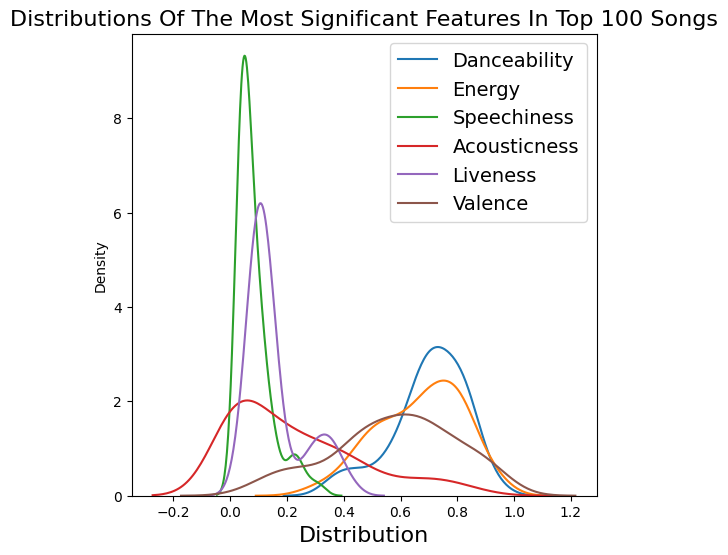

In [11]:
spotify.sort_values(by=['Popularity'])
dfdist100 = spotify.head(100)
plt.figure(figsize=(6,6))
ax = sns.distplot(dfdist100['Danceability'],hist=False,label='Danceability')
ax = sns.distplot(dfdist100['Energy'],hist=False,label='Energy')
ax = sns.distplot(dfdist100['Speechiness'],hist=False,label='Speechiness')
ax = sns.distplot(dfdist100['Acousticness'],hist=False,label='Acousticness')                  
ax = sns.distplot(dfdist100['Liveness'],hist=False,label='Liveness')                 
ax = sns.distplot(dfdist100['Valence'],hist=False,label='Valence')                  
ax.set_xlabel('Distribution',fontsize=16)
ax.set_title('Distributions Of The Most Significant Features In Top 100 Songs',fontsize=16)
plt.legend(prop={'size':'14'})
plt.show()  

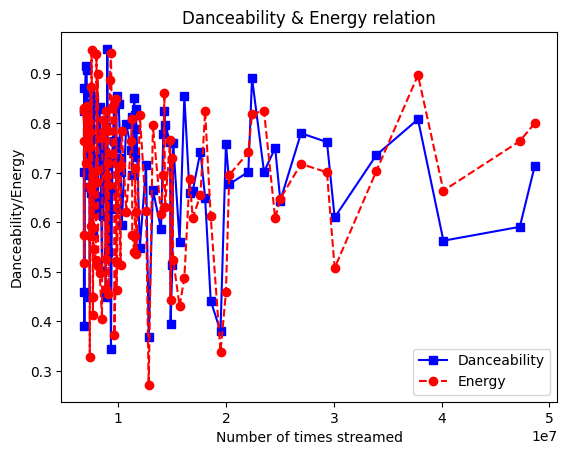

In [12]:
plt.plot(spotify.head(100).Streams, spotify.head(100).Danceability, 's-b')
plt.plot(spotify.head(100).Streams, spotify.head(100).Energy, 'o--r')
plt.xlabel('Number of times streamed')
plt.ylabel('Danceability/Energy')
plt.title('Danceability & Energy relation')
plt.legend(['Danceability', 'Energy']) #https://www.kaggle.com/code/ayushkr07/eda-spotify-top-200-charts-2020-2021

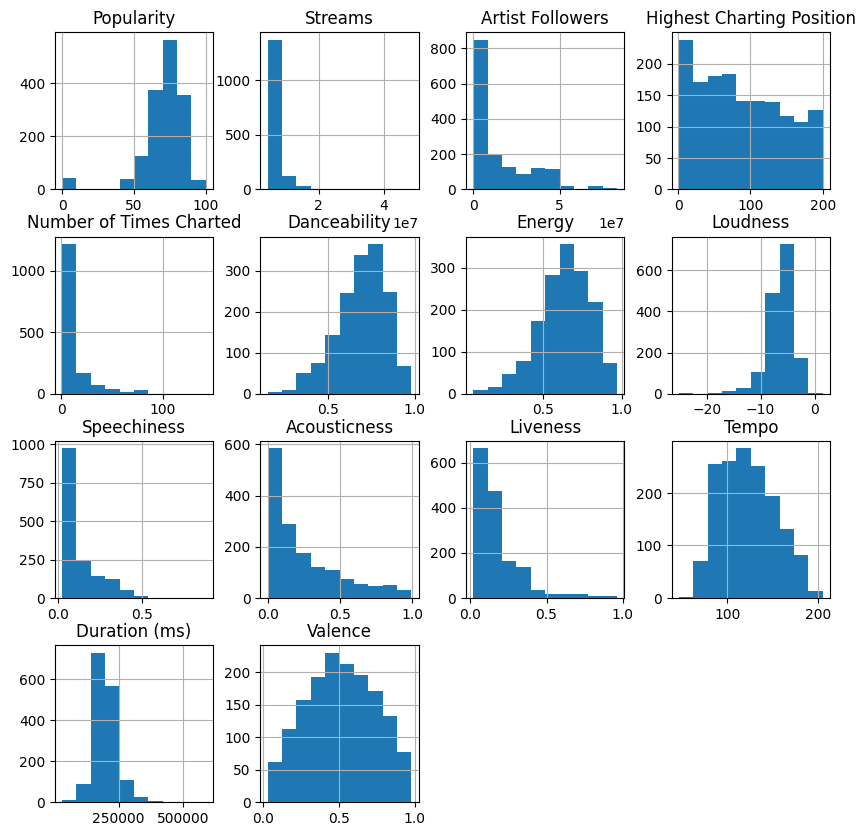

In [13]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
cols_to_see = ['Popularity', 'Streams', 'Artist Followers', 'Highest Charting Position', 'Number of Times Charted', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence']
_ = spotify[cols_to_see].hist(ax = ax)

### Analysis

Correlation between variables-

In [14]:
corr = spotify.corr()
corr['Popularity'].sort_values(ascending=False)

Popularity                   1.000000
Number of Times Charted      0.232796
Loudness                     0.158767
Streams                      0.123184
Artist Followers             0.104358
Energy                       0.094691
Duration (ms)                0.082096
Danceability                 0.028435
Valence                     -0.000953
Tempo                       -0.024951
Liveness                    -0.029460
Speechiness                 -0.032091
Acousticness                -0.091245
Highest Charting Position   -0.164167
Index                       -0.333683
Name: Popularity, dtype: float64

In [15]:
corr['Streams'].sort_values(ascending=False)

Streams                      1.000000
Popularity                   0.123184
Artist Followers             0.103251
Tempo                        0.053458
Liveness                     0.042105
Valence                      0.038381
Acousticness                 0.034054
Duration (ms)                0.015964
Energy                       0.004145
Loudness                    -0.031155
Number of Times Charted     -0.060542
Speechiness                 -0.062620
Danceability                -0.081291
Index                       -0.258741
Highest Charting Position   -0.295442
Name: Streams, dtype: float64

<AxesSubplot: xlabel='Danceability', ylabel='Popularity'>

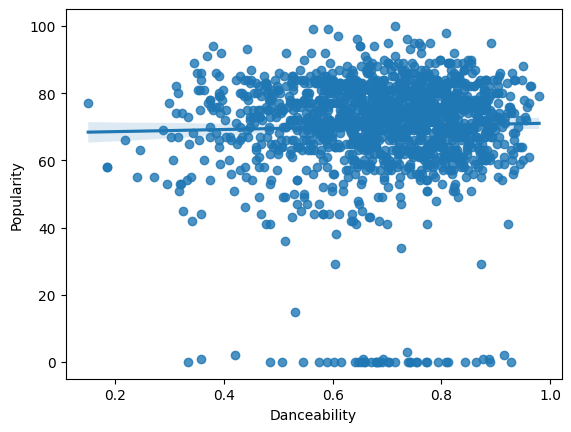

In [16]:
sns.regplot(data=spotify, x='Danceability', y= 'Popularity')

<AxesSubplot: xlabel='Energy', ylabel='Popularity'>

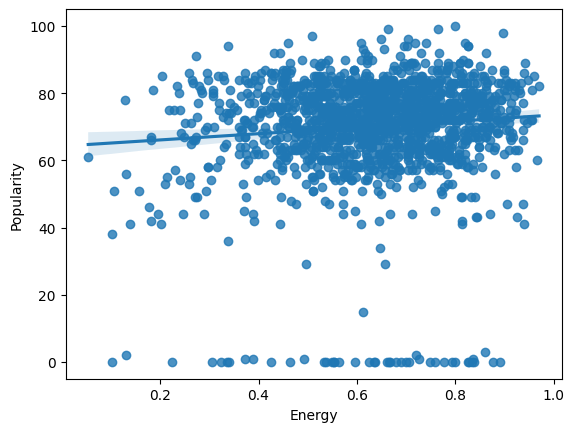

In [17]:
sns.regplot(data=spotify, x='Energy', y= 'Popularity')

<AxesSubplot: xlabel='Speechiness', ylabel='Popularity'>

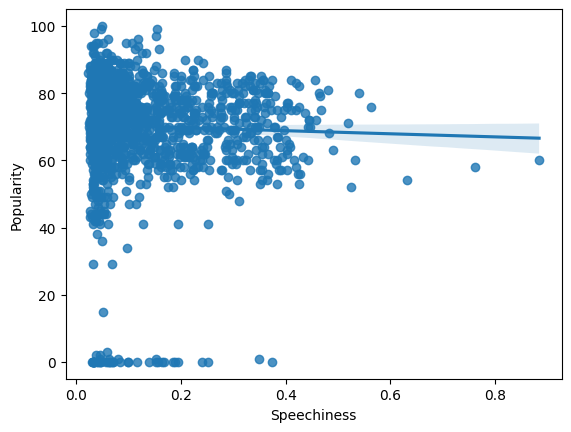

In [18]:
sns.regplot(data=spotify, x='Speechiness', y= 'Popularity')

<AxesSubplot: xlabel='Liveness', ylabel='Popularity'>

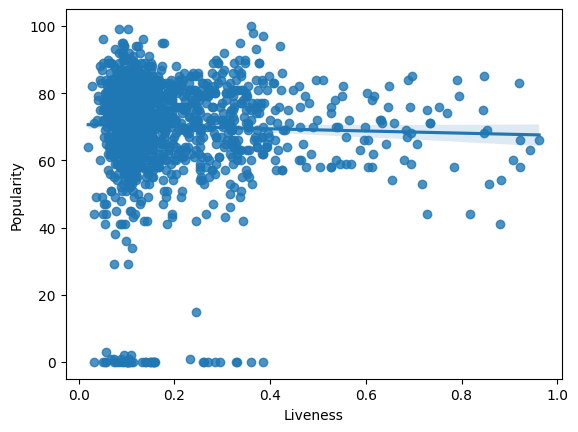

In [19]:
sns.regplot(data=spotify, x='Liveness', y= 'Popularity')

<AxesSubplot: xlabel='Valence', ylabel='Popularity'>

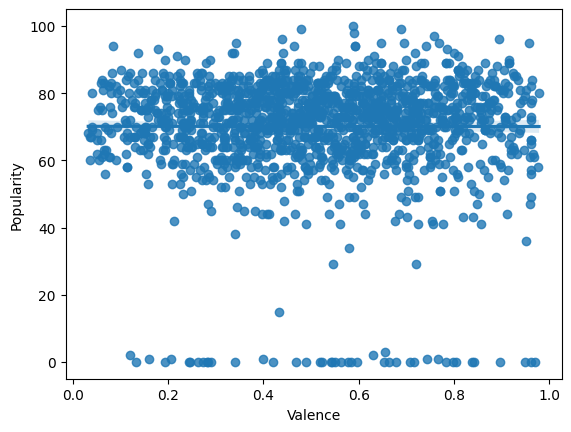

In [20]:
sns.regplot(data=spotify, x='Valence', y= 'Popularity')

<AxesSubplot: xlabel='Acousticness', ylabel='Popularity'>

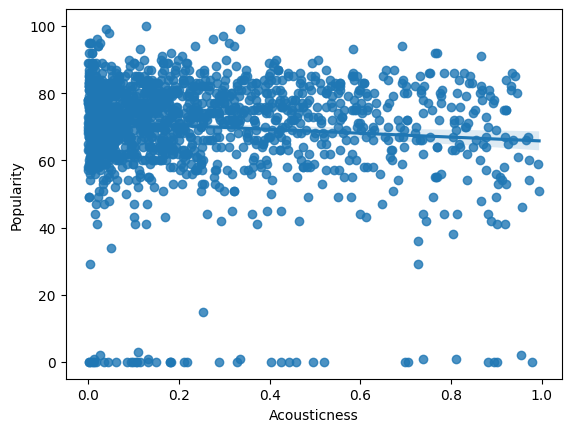

In [21]:
sns.regplot(data=spotify, x='Acousticness', y= 'Popularity')

In [22]:
! pip install statsmodels


You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
regression = smf.ols(" Q('Popularity') ~ Q('Speechiness')",  data=spotify).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('Popularity')   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.591
Date:                Thu, 08 Dec 2022   Prob (F-statistic):              0.207
Time:                        03:37:26   Log-Likelihood:                -6457.5
No. Observations:                1545   AIC:                         1.292e+04
Df Residuals:                    1543   BIC:                         1.293e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           70.6582      0.605    116.882      0.000      69.472      71.844
Q('Speechiness')    -4.6004      3.648     -1.261      0.207     -11.755       2.554
==============================================================================
Omnibus:                      843.595   Durbin-Watson:                   1.445
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6367.334
Skew:                          -2.487   Prob(JB):                         0.00
Kurtosis:                      11.612   Cond. No.                         9.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
spotify.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"[indie rock italiano, italian pop]",...,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,[australian hip hop],...,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,[pop],...,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"[pop, uk pop]",...,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"[lgbtq+ hip hop, pop rap]",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [25]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
regression = smf.ols(" Q('Highest Charting Position') ~  Q('Streams') ",  data=spotify).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Q('Highest Charting Position')   R-squared:                       0.087
Model:                                        OLS   Adj. R-squared:                  0.087
Method:                             Least Squares   F-statistic:                     147.6
Date:                            Thu, 08 Dec 2022   Prob (F-statistic):           1.71e-32
Time:                                    03:37:26   Log-Likelihood:                -8398.1
No. Observations:                            1545   AIC:                         1.680e+04
Df Residuals:                                1543   BIC:                         1.681e+04
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      120.0698      3.007     39.927      0.000     114.171     125.968
Q('Streams') -5.088e-06   4.19e-07    -12.148      0.000   -5.91e-06   -4.27e-06
==============================================================================
Omnibus:                      475.585   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.388
Skew:                           0.153   Prob(JB):                     9.51e-18
Kurtosis:                       1.940   Cond. No.                     1.53e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
regression = smf.ols("Q('Popularity') ~ Q('Liveness')",  data=spotify).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('Popularity')   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.340
Date:                Thu, 08 Dec 2022   Prob (F-statistic):              0.247
Time:                        03:37:26   Log-Likelihood:                -6457.7
No. Observations:                1545   AIC:                         1.292e+04
Df Residuals:                    1543   BIC:                         1.293e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        70.6756      0.647    109.247      0.000      69.407      71.945
Q('Liveness')    -3.2357      2.795     -1.158      0.247      -8.718       2.247
==============================================================================
Omnibus:                      841.438   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6343.323
Skew:                          -2.479   Prob(JB):                         0.00
Kurtosis:                      11.599   Cond. No.                         7.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
regression = smf.ols(" Q('Popularity') ~ Q('Acousticness')",  data=spotify).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('Popularity')   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     12.95
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           0.000329
Time:                        03:37:26   Log-Likelihood:                -6451.9
No. Observations:                1545   AIC:                         1.291e+04
Df Residuals:                    1543   BIC:                         1.292e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            71.5238      0.565    126.503      0.000      70.415      72.633
Q('Acousticness')    -5.7679      1.603     -3.599      0.000      -8.911      -2.624
==============================================================================
Omnibus:                      831.126   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6201.491
Skew:                          -2.444   Prob(JB):                         0.00
Kurtosis:                      11.511   Cond. No.                         4.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
regression = smf.ols(" Q('Popularity') ~ Q('Valence') ",  data=spotify).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('Popularity')   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.001403
Date:                Thu, 08 Dec 2022   Prob (F-statistic):              0.970
Time:                        03:37:26   Log-Likelihood:                -6458.3
No. Observations:                1545   AIC:                         1.292e+04
Df Residuals:                    1543   BIC:                         1.293e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       70.1235      0.997     70.331      0.000      68.168      72.079
Q('Valence')    -0.0664      1.772     -0.037      0.970      -3.542       3.410
==============================================================================
Omnibus:                      836.551   Durbin-Watson:                   1.444
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6232.713
Skew:                          -2.466   Prob(JB):                         0.00
Kurtosis:                      11.515   Cond. No.                         5.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
regression = smf.ols(" Q('Popularity') ~ Q('Danceability')",  data=spotify).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('Popularity')   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.249
Date:                Thu, 08 Dec 2022   Prob (F-statistic):              0.264
Time:                        03:37:26   Log-Likelihood:                -6457.7
No. Observations:                1545   AIC:                         1.292e+04
Df Residuals:                    1543   BIC:                         1.293e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            67.9098      1.992     34.097      0.000      64.003      71.816
Q('Danceability')     3.1588      2.827      1.117      0.264      -2.386       8.704
==============================================================================
Omnibus:                      836.584   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6250.002
Skew:                          -2.464   Prob(JB):                         0.00
Kurtosis:                      11.532   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
spot_genres = spotify.copy()
spot_genres['Genre']
spot_genres = spot_genres.explode('Genre')

In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
regression = smf.ols(" Q('Danceability') ~ Q('Genre')",  data=spot_genres).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Q('Danceability')   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     4.652
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          1.03e-125
Time:                        03:37:27   Log-Likelihood:                 3176.6
No. Observations:                4579   AIC:                            -5685.
Df Residuals:                    4245   BIC:                            -3538.
Df Model:                         333                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    0.3640      0.126      2.899      0.004       0.118       0.610
Q('Genre')[T.acoustic pop]                   0.3220      0.178      1.813      0.070      -0.026       0.670
Q('Genre')[T.adult standards]                0.1633      0.129      1.265      0.206      -0.090       0.416
Q('Genre')[T.afrofuturism]                   0.0260      0.178      0.146      0.884      -0.322       0.374
Q('Genre')[T.afroswing]                      0.3755      0.154      2.441      0.015       0.074       0.677
Q('Genre')[T.albanian hip hop]               0.3795      0.154      2.467      0.014       0.078       0.681
Q('Genre')[T.album rock]                     0.2979      0.133      2.236      0.025       0.037       0.559
Q('Genre')[T.alt z]                          0.2545      0.129      1.978      0.048       0.002       0.507
Q('Genre')[T.alternative metal]              0.1920      0.178      1.081      0.280      -0.156       0.540
Q('Genre')[T.alternative pop rock]           0.4510      0.178      2.539      0.011       0.103       0.799
Q('Genre')[T.alternative r&b]                0.2551      0.130      1.963      0.050       0.000       0.510
Q('Genre')[T.american folk revival]          0.3190      0.178      1.796      0.073      -0.029       0.667
Q('Genre')[T.argentine hip hop]              0.3395      0.133      2.549      0.011       0.078       0.601
Q('Genre')[T.art pop]                        0.1132      0.138      0.823      0.411      -0.157       0.383
Q('Genre')[T.art rock]                       0.3082      0.140      2.195      0.028       0.033       0.584
Q('Genre')[T.atl hip hop]                    0.4372      0.127      3.449      0.001       0.189       0.686
Q('Genre')[T.atl trap]                       0.4012      0.130      3.078      0.002       0.146       0.657
Q('Genre')[T.aussietronica]                  0.3630      0.178      2.044      0.041       0.015       0.711
Q('Genre')[T.australian dance]               0.2448      0.138      1.779      0.075      -0.025       0.515
Q('Genre')[T.australian hip hop]             0.3063      0.132      2.314      0.021       0.047       0.566
Q('Genre')[T.australian pop]                 0.3040      0.131      2.318      0.021       0.047       0.561
Q('Genre')[T.australian psych]               0.2552      0.138      1.855      0.064      -0.015       0.525
Q('Genre')[T.australian rock]                0.2100      0.178      1.182      0.237      -0.138       0.558
Q('Genre')[T.banda]                          0.3910      0.178      2.202      0.028       0.043       0.739
Q('Genre')[T.basshall]                       0.4817      0.145      3.322      0.001       0.197       0.766
Q('Genre')[T.beatlesque]       

In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
regression = smf.ols(" Q('Speechiness') ~ Q('Genre')",  data=spot_genres).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Q('Speechiness')   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     5.432
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          3.74e-158
Time:                        03:37:29   Log-Likelihood:                 4480.6
No. Observations:                4579   AIC:                            -8293.
Df Residuals:                    4245   BIC:                            -6146.
Df Model:                         333                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    0.0331      0.094      0.350      0.726      -0.152       0.218
Q('Genre')[T.acoustic pop]                   0.0137      0.134      0.103      0.918      -0.248       0.276
Q('Genre')[T.adult standards]                0.0101      0.097      0.104      0.917      -0.180       0.200
Q('Genre')[T.afrofuturism]                   0.0232      0.134      0.174      0.862      -0.239       0.285
Q('Genre')[T.afroswing]                      0.1239      0.116      1.071      0.284      -0.103       0.351
Q('Genre')[T.albanian hip hop]               0.1978      0.116      1.709      0.087      -0.029       0.425
Q('Genre')[T.album rock]                     0.0004      0.100      0.004      0.997      -0.196       0.197
Q('Genre')[T.alt z]                          0.0147      0.097      0.152      0.879      -0.175       0.205
Q('Genre')[T.alternative metal]              0.0253      0.134      0.189      0.850      -0.237       0.287
Q('Genre')[T.alternative pop rock]           0.0566      0.134      0.424      0.672      -0.205       0.318
Q('Genre')[T.alternative r&b]                0.0300      0.098      0.306      0.759      -0.162       0.222
Q('Genre')[T.american folk revival]         -0.0028      0.134     -0.021      0.983      -0.265       0.259
Q('Genre')[T.argentine hip hop]              0.1145      0.100      1.143      0.253      -0.082       0.311
Q('Genre')[T.art pop]                        0.0361      0.103      0.349      0.727      -0.167       0.239
Q('Genre')[T.art rock]                      -0.0003      0.106     -0.003      0.997      -0.207       0.207
Q('Genre')[T.atl hip hop]                    0.1903      0.095      1.996      0.046       0.003       0.377
Q('Genre')[T.atl trap]                       0.2409      0.098      2.458      0.014       0.049       0.433
Q('Genre')[T.aussietronica]                 -0.0066      0.134     -0.049      0.961      -0.268       0.255
Q('Genre')[T.australian dance]               0.0343      0.103      0.331      0.740      -0.169       0.237
Q('Genre')[T.australian hip hop]             0.0510      0.100      0.512      0.608      -0.144       0.246
Q('Genre')[T.australian pop]                 0.0265      0.099      0.268      0.789      -0.167       0.220
Q('Genre')[T.australian psych]               0.0171      0.103      0.165      0.869      -0.186       0.220
Q('Genre')[T.australian rock]                0.0999      0.134      0.748      0.455      -0.162       0.362
Q('Genre')[T.banda]                          0.1629      0.134      1.219      0.223      -0.099       0.425
Q('Genre')[T.basshall]                       0.1556      0.109      1.426      0.154      -0.058       0.369
Q('Genre')[T.beatlesque]       

In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
regression = smf.ols(" Q('Energy') ~ Q('Genre')",  data=spot_genres).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q('Energy')   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     4.484
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          1.04e-118
Time:                        03:37:30   Log-Likelihood:                 2645.0
No. Observations:                4579   AIC:                            -4622.
Df Residuals:                    4245   BIC:                            -2475.
Df Model:                         333                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    0.3780      0.141      2.680      0.007       0.101       0.655
Q('Genre')[T.acoustic pop]                   0.0790      0.199      0.396      0.692      -0.312       0.470
Q('Genre')[T.adult standards]               -0.0793      0.145     -0.547      0.584      -0.363       0.205
Q('Genre')[T.afrofuturism]                   0.4520      0.199      2.266      0.023       0.061       0.843
Q('Genre')[T.afroswing]                      0.2155      0.173      1.248      0.212      -0.123       0.554
Q('Genre')[T.albanian hip hop]               0.2230      0.173      1.291      0.197      -0.116       0.562
Q('Genre')[T.album rock]                     0.1825      0.150      1.220      0.223      -0.111       0.476
Q('Genre')[T.alt z]                          0.1008      0.145      0.698      0.485      -0.182       0.384
Q('Genre')[T.alternative metal]              0.4860      0.199      2.437      0.015       0.095       0.877
Q('Genre')[T.alternative pop rock]           0.1400      0.199      0.702      0.483      -0.251       0.531
Q('Genre')[T.alternative r&b]                0.2066      0.146      1.415      0.157      -0.080       0.493
Q('Genre')[T.american folk revival]         -0.0030      0.199     -0.015      0.988      -0.394       0.388
Q('Genre')[T.argentine hip hop]              0.3249      0.150      2.172      0.030       0.032       0.618
Q('Genre')[T.art pop]                       -0.0710      0.155     -0.460      0.646      -0.374       0.232
Q('Genre')[T.art rock]                       0.1505      0.158      0.954      0.340      -0.159       0.460
Q('Genre')[T.atl hip hop]                    0.2333      0.142      1.639      0.101      -0.046       0.512
Q('Genre')[T.atl trap]                       0.2183      0.146      1.492      0.136      -0.069       0.505
Q('Genre')[T.aussietronica]                  0.3030      0.199      1.519      0.129      -0.088       0.694
Q('Genre')[T.australian dance]               0.3096      0.155      2.004      0.045       0.007       0.613
Q('Genre')[T.australian hip hop]             0.2298      0.149      1.546      0.122      -0.062       0.521
Q('Genre')[T.australian pop]                 0.2101      0.147      1.426      0.154      -0.079       0.499
Q('Genre')[T.australian psych]               0.4582      0.155      2.966      0.003       0.155       0.761
Q('Genre')[T.australian rock]                0.5350      0.199      2.682      0.007       0.144       0.926
Q('Genre')[T.banda]                          0.1530      0.199      0.767      0.443      -0.238       0.544
Q('Genre')[T.basshall]                       0.2120      0.163      1.302      0.193      -0.107       0.531
Q('Genre')[T.beatlesque]       

In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
regression = smf.ols(" Q('Acousticness') ~ Q('Genre') ",  data=spot_genres).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Q('Acousticness')   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     4.117
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          1.99e-103
Time:                        03:37:31   Log-Likelihood:                 689.06
No. Observations:                4579   AIC:                            -710.1
Df Residuals:                    4245   BIC:                             1437.
Df Model:                         333                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    0.4700      0.216      2.174      0.030       0.046       0.894
Q('Genre')[T.acoustic pop]                   0.1250      0.306      0.409      0.683      -0.474       0.724
Q('Genre')[T.adult standards]                0.3333      0.222      1.500      0.134      -0.102       0.769
Q('Genre')[T.afrofuturism]                  -0.4679      0.306     -1.530      0.126      -1.067       0.132
Q('Genre')[T.afroswing]                     -0.1295      0.265     -0.489      0.625      -0.649       0.390
Q('Genre')[T.albanian hip hop]              -0.3762      0.265     -1.421      0.155      -0.895       0.143
Q('Genre')[T.album rock]                    -0.1112      0.229     -0.485      0.628      -0.561       0.338
Q('Genre')[T.alt z]                          0.0596      0.222      0.269      0.788      -0.375       0.494
Q('Genre')[T.alternative metal]             -0.4604      0.306     -1.506      0.132      -1.060       0.139
Q('Genre')[T.alternative pop rock]          -0.2470      0.306     -0.808      0.419      -0.846       0.352
Q('Genre')[T.alternative r&b]               -0.0591      0.224     -0.264      0.792      -0.498       0.380
Q('Genre')[T.american folk revival]          0.1090      0.306      0.356      0.721      -0.490       0.708
Q('Genre')[T.argentine hip hop]             -0.1593      0.229     -0.695      0.487      -0.609       0.290
Q('Genre')[T.art pop]                        0.2646      0.237      1.117      0.264      -0.200       0.729
Q('Genre')[T.art rock]                      -0.1032      0.242     -0.427      0.669      -0.577       0.371
Q('Genre')[T.atl hip hop]                   -0.3754      0.218     -1.720      0.085      -0.803       0.052
Q('Genre')[T.atl trap]                      -0.4192      0.224     -1.868      0.062      -0.859       0.021
Q('Genre')[T.aussietronica]                 -0.4679      0.306     -1.530      0.126      -1.067       0.132
Q('Genre')[T.australian dance]              -0.2173      0.237     -0.918      0.359      -0.682       0.247
Q('Genre')[T.australian hip hop]            -0.3389      0.228     -1.487      0.137      -0.786       0.108
Q('Genre')[T.australian pop]                -0.0744      0.226     -0.330      0.742      -0.517       0.368
Q('Genre')[T.australian psych]              -0.4374      0.237     -1.847      0.065      -0.902       0.027
Q('Genre')[T.australian rock]               -0.4090      0.306     -1.338      0.181      -1.008       0.190
Q('Genre')[T.banda]                         -0.2570      0.306     -0.841      0.401      -0.856       0.342
Q('Genre')[T.basshall]                      -0.3136      0.250     -1.256      0.209      -0.803       0.176
Q('Genre')[T.beatlesque]       

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
regression = smf.ols(" Q('Liveness') ~ Q('Genre')",  data=spot_genres).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Q('Liveness')   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.642
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           1.60e-11
Time:                        03:37:32   Log-Likelihood:                 2514.0
No. Observations:                4579   AIC:                            -4360.
Df Residuals:                    4245   BIC:                            -2213.
Df Model:                         333                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    0.3390      0.145      2.336      0.020       0.054       0.624
Q('Genre')[T.acoustic pop]                  -0.2340      0.205     -1.140      0.254      -0.636       0.168
Q('Genre')[T.adult standards]               -0.1679      0.149     -1.126      0.260      -0.460       0.124
Q('Genre')[T.afrofuturism]                  -0.1830      0.205     -0.892      0.373      -0.585       0.219
Q('Genre')[T.afroswing]                     -0.1531      0.178     -0.861      0.389      -0.502       0.195
Q('Genre')[T.albanian hip hop]              -0.2342      0.178     -1.318      0.188      -0.583       0.114
Q('Genre')[T.album rock]                    -0.1305      0.154     -0.848      0.397      -0.432       0.171
Q('Genre')[T.alt z]                         -0.1360      0.149     -0.914      0.361      -0.428       0.156
Q('Genre')[T.alternative metal]             -0.1300      0.205     -0.633      0.527      -0.532       0.272
Q('Genre')[T.alternative pop rock]          -0.2350      0.205     -1.145      0.252      -0.637       0.167
Q('Genre')[T.alternative r&b]               -0.1538      0.150     -1.024      0.306      -0.448       0.141
Q('Genre')[T.american folk revival]         -0.2630      0.205     -1.281      0.200      -0.665       0.139
Q('Genre')[T.argentine hip hop]             -0.1935      0.154     -1.257      0.209      -0.495       0.108
Q('Genre')[T.art pop]                       -0.1908      0.159     -1.200      0.230      -0.503       0.121
Q('Genre')[T.art rock]                      -0.1081      0.162     -0.666      0.506      -0.426       0.210
Q('Genre')[T.atl hip hop]                   -0.1677      0.146     -1.144      0.253      -0.455       0.120
Q('Genre')[T.atl trap]                      -0.1890      0.151     -1.255      0.210      -0.484       0.106
Q('Genre')[T.aussietronica]                 -0.2529      0.205     -1.232      0.218      -0.655       0.149
Q('Genre')[T.australian dance]              -0.2412      0.159     -1.517      0.129      -0.553       0.071
Q('Genre')[T.australian hip hop]            -0.1543      0.153     -1.009      0.313      -0.454       0.146
Q('Genre')[T.australian pop]                -0.2265      0.152     -1.494      0.135      -0.524       0.071
Q('Genre')[T.australian psych]              -0.1780      0.159     -1.120      0.263      -0.490       0.134
Q('Genre')[T.australian rock]               -0.1830      0.205     -0.892      0.373      -0.585       0.219
Q('Genre')[T.banda]                         -0.2090      0.205     -1.018      0.309      -0.611       0.193
Q('Genre')[T.basshall]                      -0.2298      0.168     -1.371      0.170      -0.558       0.099
Q('Genre')[T.beatlesque]       

In [36]:
# sns.boxplot(x="Genre",y="Popularity", data=spot_genres)

In [37]:
from statsmodels.formula.api import ols
genre_anova = ols("Popularity ~ Genre", data=spot_genres).fit()
table = sm.stats.anova_lm(genre_anova, typ=2) # Type 2 ANOVA DataFrame
table

,sum_sq,df,F,PR(>F)
Genre,141724.880195,333.0,4.886969,1.673590e-135
Residual,369691.926968,4245.0,NaN,NaN


In [38]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
regression = smf.ols(" Q('Liveness') ~ Q('Genre')",  data=spot_genres).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Q('Liveness')   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.642
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           1.60e-11
Time:                        03:37:35   Log-Likelihood:                 2514.0
No. Observations:                4579   AIC:                            -4360.
Df Residuals:                    4245   BIC:                            -2213.
Df Model:                         333                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    0.3390      0.145      2.336      0.020       0.054       0.624
Q('Genre')[T.acoustic pop]                  -0.2340      0.205     -1.140      0.254      -0.636       0.168
Q('Genre')[T.adult standards]               -0.1679      0.149     -1.126      0.260      -0.460       0.124
Q('Genre')[T.afrofuturism]                  -0.1830      0.205     -0.892      0.373      -0.585       0.219
Q('Genre')[T.afroswing]                     -0.1531      0.178     -0.861      0.389      -0.502       0.195
Q('Genre')[T.albanian hip hop]              -0.2342      0.178     -1.318      0.188      -0.583       0.114
Q('Genre')[T.album rock]                    -0.1305      0.154     -0.848      0.397      -0.432       0.171
Q('Genre')[T.alt z]                         -0.1360      0.149     -0.914      0.361      -0.428       0.156
Q('Genre')[T.alternative metal]             -0.1300      0.205     -0.633      0.527      -0.532       0.272
Q('Genre')[T.alternative pop rock]          -0.2350      0.205     -1.145      0.252      -0.637       0.167
Q('Genre')[T.alternative r&b]               -0.1538      0.150     -1.024      0.306      -0.448       0.141
Q('Genre')[T.american folk revival]         -0.2630      0.205     -1.281      0.200      -0.665       0.139
Q('Genre')[T.argentine hip hop]             -0.1935      0.154     -1.257      0.209      -0.495       0.108
Q('Genre')[T.art pop]                       -0.1908      0.159     -1.200      0.230      -0.503       0.121
Q('Genre')[T.art rock]                      -0.1081      0.162     -0.666      0.506      -0.426       0.210
Q('Genre')[T.atl hip hop]                   -0.1677      0.146     -1.144      0.253      -0.455       0.120
Q('Genre')[T.atl trap]                      -0.1890      0.151     -1.255      0.210      -0.484       0.106
Q('Genre')[T.aussietronica]                 -0.2529      0.205     -1.232      0.218      -0.655       0.149
Q('Genre')[T.australian dance]              -0.2412      0.159     -1.517      0.129      -0.553       0.071
Q('Genre')[T.australian hip hop]            -0.1543      0.153     -1.009      0.313      -0.454       0.146
Q('Genre')[T.australian pop]                -0.2265      0.152     -1.494      0.135      -0.524       0.071
Q('Genre')[T.australian psych]              -0.1780      0.159     -1.120      0.263      -0.490       0.134
Q('Genre')[T.australian rock]               -0.1830      0.205     -0.892      0.373      -0.585       0.219
Q('Genre')[T.banda]                         -0.2090      0.205     -1.018      0.309      -0.611       0.193
Q('Genre')[T.basshall]                      -0.2298      0.168     -1.371      0.170      -0.558       0.099
Q('Genre')[T.beatlesque]       

In [39]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
regression = smf.ols(" Q('Acousticness') ~ Q('Genre')",  data=spot_genres).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Q('Acousticness')   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     4.117
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          1.99e-103
Time:                        03:37:37   Log-Likelihood:                 689.06
No. Observations:                4579   AIC:                            -710.1
Df Residuals:                    4245   BIC:                             1437.
Df Model:                         333                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    0.4700      0.216      2.174      0.030       0.046       0.894
Q('Genre')[T.acoustic pop]                   0.1250      0.306      0.409      0.683      -0.474       0.724
Q('Genre')[T.adult standards]                0.3333      0.222      1.500      0.134      -0.102       0.769
Q('Genre')[T.afrofuturism]                  -0.4679      0.306     -1.530      0.126      -1.067       0.132
Q('Genre')[T.afroswing]                     -0.1295      0.265     -0.489      0.625      -0.649       0.390
Q('Genre')[T.albanian hip hop]              -0.3762      0.265     -1.421      0.155      -0.895       0.143
Q('Genre')[T.album rock]                    -0.1112      0.229     -0.485      0.628      -0.561       0.338
Q('Genre')[T.alt z]                          0.0596      0.222      0.269      0.788      -0.375       0.494
Q('Genre')[T.alternative metal]             -0.4604      0.306     -1.506      0.132      -1.060       0.139
Q('Genre')[T.alternative pop rock]          -0.2470      0.306     -0.808      0.419      -0.846       0.352
Q('Genre')[T.alternative r&b]               -0.0591      0.224     -0.264      0.792      -0.498       0.380
Q('Genre')[T.american folk revival]          0.1090      0.306      0.356      0.721      -0.490       0.708
Q('Genre')[T.argentine hip hop]             -0.1593      0.229     -0.695      0.487      -0.609       0.290
Q('Genre')[T.art pop]                        0.2646      0.237      1.117      0.264      -0.200       0.729
Q('Genre')[T.art rock]                      -0.1032      0.242     -0.427      0.669      -0.577       0.371
Q('Genre')[T.atl hip hop]                   -0.3754      0.218     -1.720      0.085      -0.803       0.052
Q('Genre')[T.atl trap]                      -0.4192      0.224     -1.868      0.062      -0.859       0.021
Q('Genre')[T.aussietronica]                 -0.4679      0.306     -1.530      0.126      -1.067       0.132
Q('Genre')[T.australian dance]              -0.2173      0.237     -0.918      0.359      -0.682       0.247
Q('Genre')[T.australian hip hop]            -0.3389      0.228     -1.487      0.137      -0.786       0.108
Q('Genre')[T.australian pop]                -0.0744      0.226     -0.330      0.742      -0.517       0.368
Q('Genre')[T.australian psych]              -0.4374      0.237     -1.847      0.065      -0.902       0.027
Q('Genre')[T.australian rock]               -0.4090      0.306     -1.338      0.181      -1.008       0.190
Q('Genre')[T.banda]                         -0.2570      0.306     -0.841      0.401      -0.856       0.342
Q('Genre')[T.basshall]                      -0.3136      0.250     -1.256      0.209      -0.803       0.176
Q('Genre')[T.beatlesque]       

In [40]:
# from statsmodels.stats.multicomp import pairwise_tukeyhsd
# a = pairwise_tukeyhsd(spot_genres['Popularity'], spot_genres['Genre'])
# a.summary()

In [41]:
from statsmodels.formula.api import ols
genre_anova = ols("Popularity ~ Artist ", data=spot_genres).fit()
table = sm.stats.anova_lm(genre_anova, typ=2) # Type 2 ANOVA DataFrame
table

,sum_sq,df,F,PR(>F)
Artist,493637.624244,711.0,11.056327,0.0
Residual,247539.433770,3942.0,NaN,NaN


In [42]:
corr_top = spotify.corr().unstack().reset_index()
corr_top = corr_top.rename(columns={'level_0': 'var1', 'level_1':'var2', 0:'corr'})
corr_top = corr_top[corr_top['corr'] < 1.0]
corr_top.sort_values(by=['corr'], key=abs, ascending=False).head(8)

,var1,var2,corr
113,Energy,Loudness,0.732616
127,Loudness,Energy,0.732616
157,Acousticness,Energy,-0.542399
115,Energy,Acousticness,-0.542399
158,Acousticness,Loudness,-0.477431
130,Loudness,Acousticness,-0.477431
31,Number of Times Charted,Highest Charting Position,-0.417748
17,Highest Charting Position,Number of Times Charted,-0.417748


<AxesSubplot: >

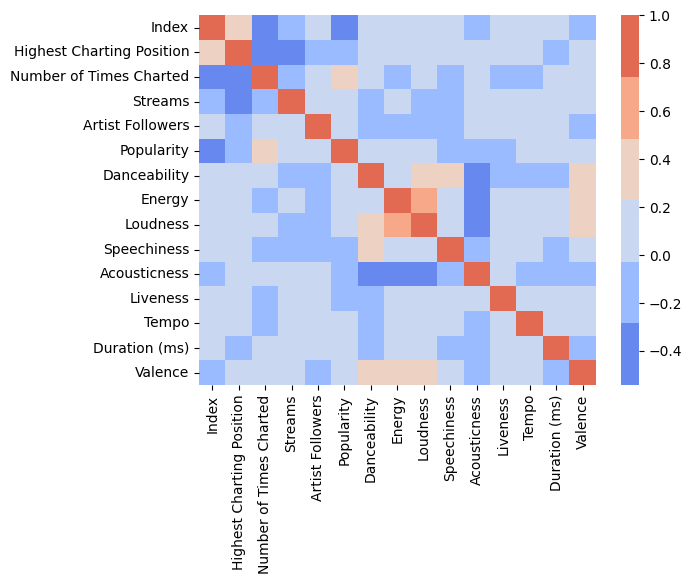

In [43]:
sns.heatmap(spotify.corr(),cmap=sns.color_palette("coolwarm"))

Genre Exploration- 

In [44]:

# spot_genres.groupby('Genre') 
# hist = sns.histplot(spot_genres['Genre'])
# hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
# hist


# each row in spot_genres is representative of one genre and that genre's mean other values
# spot_genres = spot_genres.groupby('Genre').mean()
# spot_genres.reset_index(inplace = True)
# spot_genres = spot_genres.drop('Index', axis=1)

# # encode genres in spot_genres dataset
# from sklearn.preprocessing import LabelEncoder #Encodes Categorical Data into Numerical

# genre_encoder = LabelEncoder()
# spot_genres['Genre'] = genre_encoder.fit_transform(spot_genres['Genre'])
# spot_genres.head()

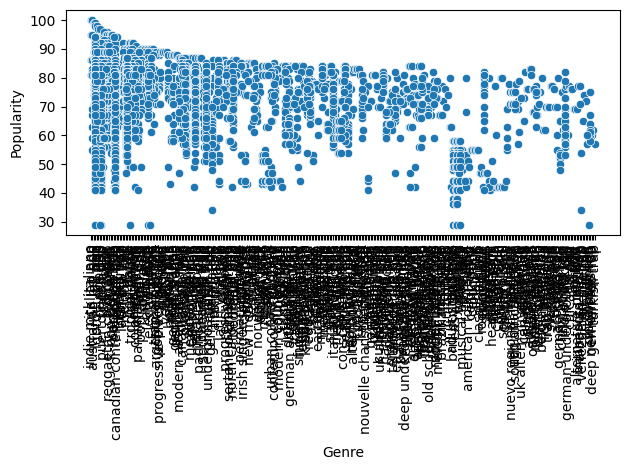

In [45]:

spot_genres['Genre']
scatter = sns.scatterplot(x= spot_genres['Genre'], y= spot_genres["Popularity"])
scatter.set_xticklabels(scatter.get_xticklabels(), rotation=90)
scatter
plt.tight_layout()
plt.show()

In [46]:
# spot_drop = spotify.copy()
# spot_drop.drop('Week of Highest Charting', axis=1, inplace=True)
# spot_drop.drop('Song Name', axis=1, inplace=True)
# spot_drop.drop('Artist', axis=1, inplace=True)
# spot_drop.drop('Song ID', axis=1, inplace=True)
# spot_drop.drop('Genre', axis=1, inplace=True)
# spot_drop.drop('Release Date', axis=1, inplace=True)
# spot_drop.drop('Weeks Charted', axis=1, inplace=True)
# spot_drop.drop('Chord', axis=1, inplace=True)

# spot_drop.info()

In [47]:
# feature selection 
# https://machinelearningmastery.com/calculate-feature-importance-with-python/
from matplotlib import pyplot
# get importance
importance = lin_reg0.coef_
# summarize feature importance
for i,v in list(enumerate(importance)):
	print(X_columns[i])
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

NameError: name 'lin_reg0' is not defined

This shows which features best predict the popularity of songs (remember this spot_genres df is one row with each genre that is represented, and the mean for every other variable when grouped by the genre). Looks like energy is by far the most influential. Now trying regression:

In [ ]:
# Linear Regression of spot_genre with its model on predicting popularity 
linear_model = LinearRegression()
linear_model.fit(X_train_scaled,y_train)
print(linear_model.score(X_train_scaled,y_train))

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
random_model = RandomForestRegressor(n_estimators=50)
random_model.fit(X_train_scaled,y_train)
print(random_model.score(X_train_scaled,y_train))

0.422424617234164
0.9276831838791288


ok promising^ now trying classifiers:

In [ ]:
# there is something with the preprocessing- pls help
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

reg = LogisticRegression(solver='liblinear',multi_class="auto")
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
reg.score(X_test_scaled,y_test)

NameError: name 'X_train_scaled' is not defined

### Following is without genre- on popularity and highest charting position

In [ ]:
spotify = spotify.drop(['Index', 'Week of Highest Charting', 'Song Name', 'Artist', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted'], axis=1)
spotify.head()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,8,48633449,3377762,100,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589,B
1,2,3,47248719,2230022,99,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478,C#/Db
2,1,11,40162559,6266514,99,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688,A
3,3,5,37799456,83293380,98,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591,B
4,5,1,33948454,5473565,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


below this is try #1

The absolute values of these results tell us the importance that each feature plays in predicting popularity. The highest one (for obvious reasons) is the highest charting position. After that it is energy and then speechiness. 

Classifiers 

Clustering

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scale(demo_X))

NameError: name 'scale' is not defined

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0, perplexity=2)
X = music_X.copy()
X_2d = tsne.fit_transform(X)
X_2d

In [ ]:
# do the x and y thing 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

features = ['Popularity', 'Danceability']
spot_drop = spot_drop[features]

X_pop = spot_drop.drop(['Popularity'], axis=1)
Y_pop = spot_drop[['Popularity']]

X_pop_train, X_pop_test, Y_pop_train, Y_pop_test = train_test_split(X_pop, Y_pop, test_size=0.2, random_state=42)

# first scale data
stand_scale = StandardScaler()
X_pop_train = stand_scale.fit_transform(X_pop_train)
X_pop_test = stand_scale.transform(X_pop_test)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

model = LogisticRegression(solver='liblinear',multi_class="auto")

model.fit(X_pop_train, Y_pop_train)
y_pred = model.predict(X_pop_test)
print(accuracy_score(Y_pop_test, y_pred))
print(classification_report(Y_pop_test, y_pred))
# np.sqrt(mean_squared_error(Y_pop_test, popularity_predictions))

# X_chart_train = stand_scale.fit_transform(X_chart_train)
# X_chart_test = stand_scale.transform(X_chart_test)

0.032362459546925564
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         3
          48       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         4
          52       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         3
          56       0.00      0.00      0.00         2
          57       0.00      0.00      0.00         4
          58       0.00      0.00      0.00         5
          59       0.00      0.00      0.00         5
          60       0.00      0.00      0.00         6
          61       0.00      0.00      0.00         5
      

# Genre prediction:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
import ast
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

warnings.filterwarnings("ignore")

In [ ]:
spotify = pd.read_csv('spotify_dataset.csv')
spotify = spotify.drop(list(spotify[spotify['Artist Followers'] == ' '].index))
spotify['Streams'] = spotify['Streams'].apply(lambda x : x.replace(',', ''))
int_cols = ['Streams', 'Artist Followers', 'Popularity', 'Duration (ms)']
float_cols = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Valence']
spotify[int_cols] = spotify[int_cols].astype('int')
spotify[float_cols] = spotify[float_cols].astype('float')
spotify['Release Date'] = pd.to_datetime(spotify['Release Date'])
spotify['Genre'] = spotify['Genre'].apply(lambda x : ast.literal_eval(x))

spot_genres = spotify.copy()
spot_genres['Genre']
spot_genres = spot_genres.explode('Genre')

def replace_genres(genre):
    if type(genre) != str:
        return genre
    if 'rock' in genre:
        return 'rock'
    elif 'pop' in genre:
        return 'pop'
    elif 'reggaeton' or 'r&b' in genre:
        return 'r&b'
    elif 'hip hop' in genre:
        return 'hip hop'
    elif 'dance' in genre:
        return 'dance'
    elif 'rap' in genre:
        return 'rap'
    elif 'jazz' in genre:
        return 'jazz'
    else:
        return genre


In [ ]:
# spot_genres = spot_genres.groupby('Genre').mean()
spot_genres.reset_index(inplace = True)
spot_genres = spot_genres.drop(['index', 'Index', 'Week of Highest Charting', 
                        'Song Name', 'Artist', 'Song ID',
                        'Release Date', 'Weeks Charted', 
                        'Highest Charting Position', 'Number of Times Charted', 
                        'Streams', 'Popularity', 'Artist Followers'], axis=1)

genre_encoder = preprocessing.LabelEncoder()
spot_genres['Chord'] = genre_encoder.fit_transform(spot_genres['Chord'])

target = 'Genre'

X = spot_genres.drop(target, axis=1)
y = spot_genres[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

stand_scale = preprocessing.StandardScaler()
X_train_scaled = stand_scale.fit_transform(X_train)
X_test_scaled = stand_scale.transform(X_test)
X_train = X_train_scaled
X_test = X_test_scaled

final_model = VotingClassifier(
    estimators=[('KNN', KNeighborsClassifier(3)), 
                ('SVC2', SVC(gamma=2, C=1)),
                ('DT', DecisionTreeClassifier(max_depth=5)),
                ('RFC', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),
                ('MLP', MLPClassifier(alpha=1, max_iter=1000)),
                ('ADA', AdaBoostClassifier()),
                ('GNB', GaussianNB())], voting='hard')

final_model.fit(X_train, y_train)
y_pred_ens = final_model.predict(X_test)
accuracy = final_model.score(X_test, y_test)
print("%s Accuracy: %.2f%%" % ('Ensemble',accuracy * 100.0))

Ensemble Accuracy: 70.52%


<AxesSubplot: >

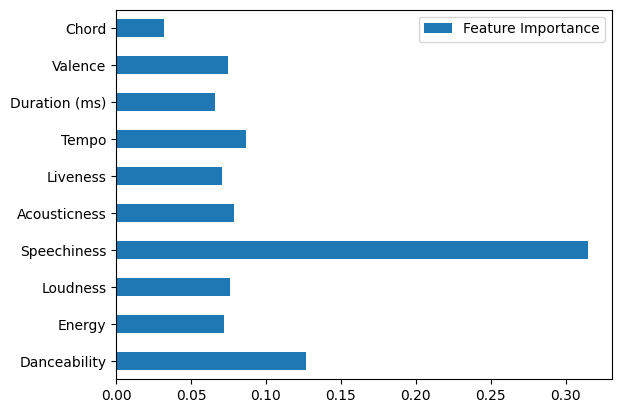

In [ ]:
model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
model.fit(X_train, y_train)
feat_importance = model.feature_importances_
pd.DataFrame({'Feature Importance':feat_importance},
            index=list(X)).plot(kind='barh')

this tells us that the model works ~71% of the time to predict a song's genre based on the above features. Speechiness is by far the most telling feature of a song's genre, followed by danceability and then tempo. Before, we explored before how correlated the different variables are with each other, and found that 

In [ ]:
spot_genres['Genre']
scatter = sns.scatterplot(x= spot_genres['Genre'], y= spot_genres["Popularity"])
scatter.set_xticklabels(scatter.get_xticklabels(), rotation=90)
scatter
plt.tight_layout()
plt.show()

KeyError: 'Popularity'

# Classification w popularity bins- works but not accurate

In [ ]:
# import and convert to usable column types and get rid of irrelevant columns
spotify = pd.read_csv('spotify_dataset.csv')
spotify = spotify.drop(list(spotify[spotify['Artist Followers'] == ' '].index))
spotify['Streams'] = spotify['Streams'].apply(lambda x : x.replace(',', ''))
int_cols = ['Streams', 'Artist Followers', 'Popularity', 'Duration (ms)']
float_cols = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Valence']
spotify[int_cols] = spotify[int_cols].astype('int')
spotify[float_cols] = spotify[float_cols].astype('float')
spotify['Release Date'] = pd.to_datetime(spotify['Release Date'])
spotify['Genre'] = spotify['Genre'].apply(lambda x : ast.literal_eval(x))

spotify = spotify.drop(['Index', 'Week of Highest Charting', 
                        'Song Name', 'Artist', 'Song ID', 'Genre',
                        'Release Date', 'Weeks Charted'], axis=1)

spotify['Popularity_bin'] = pd.qcut(spotify['Popularity'], 10, labels = np.arange(10))

genre_encoder = preprocessing.LabelEncoder()
spotify['Chord'] = genre_encoder.fit_transform(spotify['Chord'])

In [ ]:
# do x and y thing
spotify = spotify.drop('Popularity', axis=1)

target = 'Popularity_bin'

X = spotify.drop(target, axis=1)
y = spotify[target]
X_columns = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

stand_scale = preprocessing.StandardScaler()
X_train_scaled = stand_scale.fit_transform(X_train)
X_test_scaled = stand_scale.transform(X_test)

# linear regression
lin_reg0 = LinearRegression()
lin_reg0.fit(X_train_scaled, y_train)
y_predictions = lin_reg0.predict(X_test_scaled)
y_predictions = y_predictions.round()
np.sqrt(mean_squared_error(y_test, y_predictions))

2.524956342344227

In [ ]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    ]

X_train = X_train_scaled
X_test = X_test_scaled

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # evaluate predictions
    accuracy = clf.score(X_test, y_test)
    print("%s Accuracy: %.2f%%" % (name,accuracy * 100.0))

Nearest Neighbors Accuracy: 18.77%
Linear SVM Accuracy: 24.27%
RBF SVM Accuracy: 9.39%
Decision Tree Accuracy: 29.77%
Random Forest Accuracy: 24.60%
Neural Net Accuracy: 27.83%
AdaBoost Accuracy: 29.13%
Naive Bayes Accuracy: 23.30%


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1ce3b59d-bd97-45a6-a886-41ee4ddb56f8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>